# Statistical Analysis for Language Models
Greetings, young ones. Due to popular demand, we are learning about several statistical analyses methods for assessing our language models. We'll take the case for two methods: text classification and sentiment analysis. We will be using the `Scikit-learn` and `Scipy` packages for this section. 

```pip3 install scikit-learn scipy```

### Data preparation

In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

In [282]:
def clean(texts):
    """
    Replaces empty texts, replaces text with lower case characters,
    remove special characters and RTs, remove leading and trailing
    whitespaces, and remove stopwords.
    """
    texts = texts.fillna('')
    texts = texts.str.lower()
    texts = texts.str.replace(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|rt', '')
    texts = texts.str.replace(r'^\s+|\s+$', '') 
    texts = texts.apply(lambda x: ' '.join([w for w in x.split() if w not in (stopwords)]))
    return texts

In [283]:
def clean2(texts):
    texts = texts.lower()
    texts = texts.replace(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|rt', '')
    texts = texts.replace(r'^\s+|\s+$', '') 
    texts = ' '.join([w for w in texts.split() if w not in (stopwords)])
    return texts

In [284]:
# Import messages into dataframe
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
texts = messages['message']
labels = messages['label']
texts.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [285]:
# Clean the texts 
clean_texts = clean(texts)
clean_texts.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: message, dtype: object

---

### Sentiment analysis

In [286]:
def analyze_texts(texts):
    """Analyzes the sentiment polarity and subjectivity of text"""
    sentiment = []
    subjectivity = []
    for text in texts:
        blob = TextBlob(text)
        sentiment.append(blob.polarity)
        subjectivity.append(blob.subjectivity)
    return sentiment, subjectivity

In [287]:
sentiment, subjectivity = analyze_texts(clean_texts)
messages['sentiment'] = sentiment
messages['subjectivity'] = subjectivity
messages.head()

,label,message,sentiment,subjectivity
0,ham,"Go until jurong point, crazy.. Available only ...",0.2,0.683333
1,ham,Ok lar... Joking wif u oni...,0.5,0.500000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.3,0.550000
3,ham,U dun say so early hor... U c already then say...,0.1,0.300000
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.0,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12383f6a0>,
      dtype=object)

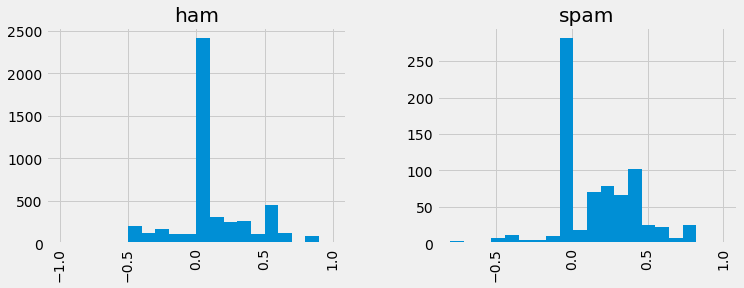

In [288]:
messages.hist(column='sentiment', by='label', bins=20, figsize=(12,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123432f28>,
      dtype=object)

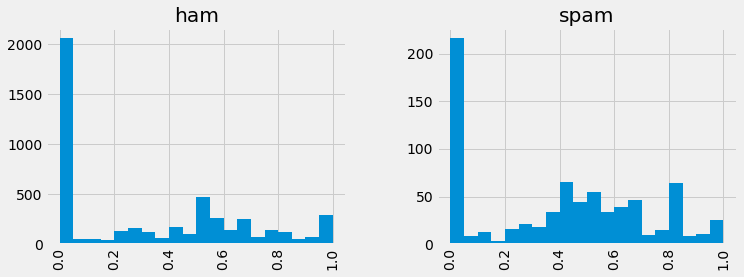

In [289]:
messages.hist(column='subjectivity', by='label', bins=20, figsize=(12,4))

---

### Analysis of Variance (ANOVA) One-way F-test
The `one-way ANOVA` tests whether two or more groups have the same population mean. This method produces the `F-statistic`, which measures the ratio of (1) the variance among the means of the group to (2) variance within samples of each group. The resulting significance level of the `f-statistic` is given by the `p-value`.

A high `f-statistic` denotes significant differences between the group given a sufficiently small `p-value`. 

Sum of Squares (SS) Treatment: <img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/2f35e5fe5c3f3645a5c57e692bdb603b2d2ec44c' width=200 />

Sum of Squares (SS) Error: <img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/bb1c0bc12c7ccd1b04669d756e871be102abc5ff' width=200/>

Degrees of Freedom (DF) Treatment: <img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/7bffa0987d2de0ca02563500330322b229b365c4' width=50/>

Degrees of Freedom (DF) Error: <img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/dddb46bd20f5f0e933f390e71129634ee02ac72b' width=50/>

Mean Square (MS) Treatment: <img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/df86cc9c9790734a1c81847694084c50a3920509' width=100/>

Mean Square (MS) error: <img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/9e5caea0b84b519fb150347f3f26b0b53cc5e2b8' width=75/>

F-statistic: <img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/8c9779d83311555c01cd1d35e0bd7b3aa32526b8' width=100/>

In [290]:
from scipy.stats import f_oneway

In [291]:
ham_sent = messages[messages['label'] == 'ham']['sentiment']
spam_sent = messages[messages['label'] == 'spam']['sentiment']

ham_subj = messages[messages['label'] == 'ham']['subjectivity']
spam_subj = messages[messages['label'] == 'spam']['subjectivity']

In [292]:
f_sent = f_oneway(ham_sent.sample(500), spam_sent.sample(500))
f_subj = f_oneway(ham_subj.sample(500), spam_subj.sample(500))

In [293]:
print("Sentiment ANOVA, f-statistic: {0:.2f}, p-value: {1:.2e}".format(f_sent[0], f_sent[1]))
print("Subjectivity ANOVA, f-statistic: {0:.2f}, p-value: {1:.2e}".format(f_subj[0], f_subj[1]))

Sentiment ANOVA, f-statistic: 21.26, p-value: 4.53e-06
Subjectivity ANOVA, f-statistic: 5.08, p-value: 2.45e-02


### Kruskal-Wallis H-test
The `Kruskal-Wallis H-test` is a non-parametric version of ANOVA. Instead of checking significant differences by analyzing the variance, the `H-test` measures the probability that the group samples were drawn from the same distribution. 

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/c52009c6c21918d5389c27dc7e9d853a2462119e' width=300 />

In [294]:
from scipy.stats import kruskal
h_sent = kruskal(ham_sent.sample(500), spam_sent.sample(500))
h_subj = kruskal(ham_subj.sample(500), spam_subj.sample(500))

In [295]:
print("Sentiment H-test, f-statistic: {0:.2f}, p-value: {1:.2e}".format(h_sent[0], h_sent[1]))
print("Subjectivity H-test, f-statistic: {0:.2f}, p-value: {1:.2e}".format(h_subj[0], h_subj[1]))

Sentiment H-test, f-statistic: 36.18, p-value: 1.80e-09
Subjectivity H-test, f-statistic: 3.89, p-value: 4.85e-02


---

### Text Vectorization

In [296]:
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = stopwords.words('english')

In [297]:
def text_to_tfidf(texts):
    vectorizer = TfidfVectorizer(max_features=5000)
    tfidf = vectorizer.fit_transform(texts)
    return tfidf

In [298]:
# Get TFIDF matrix
tfidf = text_to_tfidf(clean_texts)
print('TFIDF matrix shape:', tfidf.toarray().shape)

TFIDF matrix shape: (5571, 5000)


---

### Text Classification

To classify our texts into ham or spam, we will be using Naive Bayes classification models. These model apply [Bayes' theorem](https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/) with a "naive" assumption that every pair of features has conditional independence between themselves given a classification. In our case, we can use this to probabilistically classify our texts. 

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/52bd0ca5938da89d7f9bf388dc7edcbd546c118e' width=200/>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/5ed52009429e5f3028302427a067822fdfc58059' width=200/>

In [299]:
from sklearn.naive_bayes import GaussianNB

In [300]:
model = GaussianNB().fit(tfidf.toarray(), labels)
predictions = model.predict(tfidf.toarray())

### Accuracy Evaluation Metrics

For our classifier, we use the standard evaluation metrics of `accuracy`, `precision`, `recall`, and `F1 score` (not to be confused with the f-statistic).

`Accuracy` is the number of correct predictions made divided by the total number of predictions. In general, accuracy alone is not a good indicator of performance. If there are imbalances in the distribution of classes (e.g. more ham than spam), predicting everything as belonging to one class will actually return high accuracy, demonstrating the accuracy paradox.

We solve this by measuring precision and recall. `Precision` denotes the number of texts predicted correctly from those predicted as belonging to a given class. In other words, it is the ratio between true positive predictions divided by both true and false positive predictions. Meanwhile, `recall` denotes the number of texts predicted correctly from those that should have been predicted as beloning to a given class. Simply, it is all the true positives divided by the sum of true positives and false negatives. 

The `F1 score` is the harmonic mean between `precision` and `recall`. It denotes the performance of your model given precision and recall, making it a better metric compared to `accuracy`.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [301]:
from sklearn.metrics import classification_report

In [302]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

         ham       1.00      0.90      0.95      4824
        spam       0.61      1.00      0.75       747

   micro avg       0.91      0.91      0.91      5571
   macro avg       0.80      0.95      0.85      5571
weighted avg       0.95      0.91      0.92      5571



---

### Pipelining

To hasten our process and lessen our code, we will make use of `Scikit-learn`'s pipelining features. To make sure our model isn't overfitting the data, we will split the dataset into training and testing sets. 

In [303]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [304]:
text_train, text_test, label_train, label_test = train_test_split(texts, labels, test_size=0.2)

In [305]:
pipeline = Pipeline([
    ('count', CountVectorizer(analyzer=clean2)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [306]:
pipeline.fit(text_train, label_train)

Pipeline(memory=None,
     steps=[('count', CountVectorizer(analyzer=<function clean2 at 0x1275a3158>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
   ...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [278]:
prediction_test = pipeline.predict(text_test)
print(classification_report(prediction_test, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1000
        spam       0.80      0.97      0.88       115

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.90      0.97      0.93      1115
weighted avg       0.98      0.97      0.97      1115

